In [126]:
import pandas as pd
import sklearn
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from lvm_read import read
from sklearn import linear_model, decomposition, preprocessing,metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from sklearn import metrics

In [90]:
caseR=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/sine_sweep.lvm'))
caseH=read(join(os.getcwd(),'Case_H_(+25)/Case_H_(+25)_1/sine_sweep.lvm'))
caseL=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/sine_sweep.lvm'))
caseH[0]['Channel names'].pop()
caseR[0]['Channel names'].pop()
caseL[0]['Channel names'].pop()
dfR=pd.DataFrame(caseR[0]['data'],columns=caseR[0]['Channel names'])
dfH=pd.DataFrame(caseH[0]['data'],columns=caseH[0]['Channel names'])
dfL=pd.DataFrame(caseL[0]['data'],columns=caseL[0]['Channel names'])
dfR.head()

,X_Value,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,K7861_H,...,Strain_16_temp_comp,Strain_17_rosette_A,Strain_18_rosette_B,Strain_19_rosette_C,Strain_20_rosette_A,Strain_21_rosette_B,Strain_22_rosette_C,Strain_23,Strain_24,Strain_16_temp_comp (Filtered)
0,0.0000,0.001935,0.000959,0.002144,-0.001090,0.001632,0.000360,-0.000706,0.001287,5.486116,...,-7.748118e-07,-0.000002,-0.000004,-0.000003,-0.000003,-0.000002,-0.000003,-1.193234e-06,-1.210742e-06,-0.000003
1,0.0006,0.001228,0.001371,0.001606,-0.000005,0.001673,0.000923,0.000200,0.000483,5.497067,...,-1.350953e-06,-0.000003,-0.000003,-0.000004,-0.000003,-0.000004,-0.000003,-8.582080e-07,-1.165173e-06,-0.000002
2,0.0012,0.002167,0.001453,0.001058,-0.000115,0.001825,0.000973,0.001064,-0.000358,5.498020,...,-2.903599e-06,-0.000002,-0.000004,-0.000003,-0.000003,-0.000003,-0.000003,-1.619334e-06,-9.796406e-07,-0.000002
3,0.0018,0.001728,0.001589,0.000873,-0.000523,0.000710,0.000291,-0.000367,0.000319,5.490879,...,-7.441041e-06,-0.000001,-0.000003,-0.000004,-0.000004,-0.000003,-0.000003,-1.583554e-06,-1.721768e-06,-0.000002
4,0.0024,0.001073,0.001575,0.001366,-0.000226,0.001327,0.000306,-0.001092,0.000962,5.485814,...,-8.596545e-06,-0.000002,-0.000003,-0.000003,-0.000003,-0.000002,-0.000002,-1.359120e-06,-1.835690e-06,-0.000001


In [102]:
N,Chno=dfH.shape
Ts = 6 * 1e-4 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts
sample_rate=1666 #Hertz

HCh1 = dfH['force']  # célula de carga: força do shakerH
HCh2 = dfH['Ch1'] # 
HCh3 = dfH['Ch2'] # 
HCh4 = dfH['Ch3'] # 
HCh5 = dfH['Ch4'] # 
HCh6 = dfH['Ch5'] # 
HCh7 = dfH['Ch6'] # 
HCh8 = dfH['Ch7'] # 
HCh9 = dfH['Ch8'] # 

RCh1 = dfR['force']  # célula de carga: força do shakerH
RCh2 = dfR['Ch1'] # 
RCh3 = dfR['Ch2'] # 
RCh4 = dfR['Ch3'] # 
RCh5 = dfR['Ch4'] # 
RCh6 = dfR['Ch5'] # 
RCh7 = dfR['Ch6'] # 
RCh8 = dfR['Ch7'] # 
RCh9 = dfR['Ch8'] # 

LCh1 = dfL['force']  # célula de carga: força do shakerH
LCh2 = dfL['Ch1'] # 
LCh3 = dfL['Ch2'] # 
LCh4 = dfL['Ch3'] # 
LCh5 = dfL['Ch4'] # 
LCh6 = dfL['Ch5'] # 
LCh7 = dfL['Ch6'] # 
LCh8 = dfL['Ch7'] # 
LCh9 = dfL['Ch8'] #

# Análise Exploratória

In [ ]:
dfR.describe()
dfH.describe()
dfL.describe()

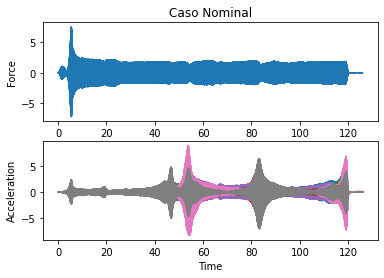

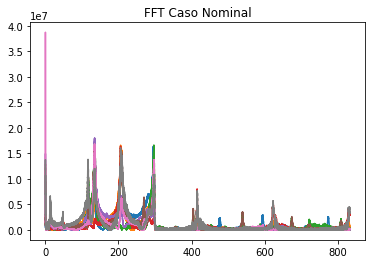

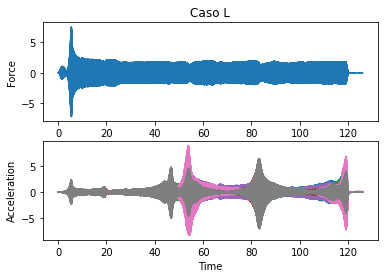

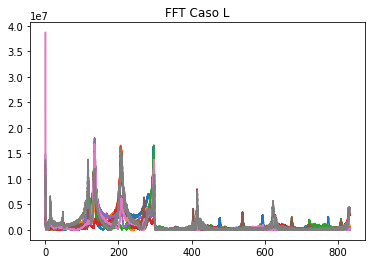

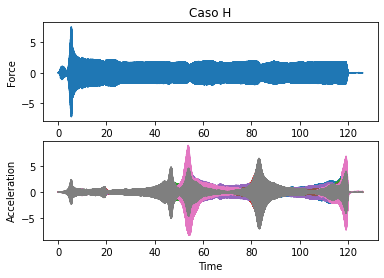

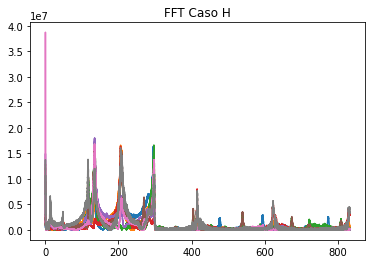

In [124]:

#rnorm1 = np.int16((RCh1 / RCh1.max()) * 32767)
rnorm2 = np.int16((RCh2 / RCh2.max()) * 32767)
rnorm3 = np.int16((RCh3 / RCh3.max()) * 32767)
rnorm4 = np.int16((RCh4 / RCh4.max()) * 32767)
rnorm5 = np.int16((RCh5 / RCh5.max()) * 32767)
rnorm6 = np.int16((RCh6 / RCh6.max()) * 32767)
rnorm7 = np.int16((RCh7 / RCh7.max()) * 32767)
rnorm8 = np.int16((RCh8 / RCh8.max()) * 32767)
rnorm9 = np.int16((RCh9 / RCh9.max()) * 32767)

hnorm2 = np.int16((HCh2 / HCh2.max()) * 32767)
hnorm3 = np.int16((HCh3 / HCh3.max()) * 32767)
hnorm4 = np.int16((HCh4 / HCh4.max()) * 32767)
hnorm5 = np.int16((HCh5 / HCh5.max()) * 32767)
hnorm6 = np.int16((HCh6 / HCh6.max()) * 32767)
hnorm7 = np.int16((HCh7 / HCh7.max()) * 32767)
hnorm8 = np.int16((HCh8 / HCh8.max()) * 32767)
hnorm9 = np.int16((HCh9 / HCh9.max()) * 32767)

lnorm2 = np.int16((LCh2 / LCh2.max()) * 32767)
lnorm3 = np.int16((LCh3 / LCh3.max()) * 32767)
lnorm4 = np.int16((LCh4 / LCh4.max()) * 32767)
lnorm5 = np.int16((LCh5 / LCh5.max()) * 32767)
lnorm6 = np.int16((LCh6 / LCh6.max()) * 32767)
lnorm7 = np.int16((LCh7 / LCh7.max()) * 32767)
lnorm8 = np.int16((LCh8 / LCh8.max()) * 32767)
lnorm9 = np.int16((LCh9 / LCh9.max()) * 32767)

xf = rfftfreq(N, 1 / sample_rate)

rf2 = rfft(rnorm2)
rf3 = rfft(rnorm3)
rf4 = rfft(rnorm4)
rf5 = rfft(rnorm5)
rf6 = rfft(rnorm6)
rf7 = rfft(rnorm7)
rf8 = rfft(rnorm8)
rf9 = rfft(rnorm9)

hf2 = rfft(hnorm2)
hf3 = rfft(hnorm3)
hf4 = rfft(hnorm4)
hf5 = rfft(hnorm5)
hf6 = rfft(hnorm6)
hf7 = rfft(hnorm7)
hf8 = rfft(hnorm8)
hf9 = rfft(hnorm9)

lf2 = rfft(lnorm2)
lf3 = rfft(lnorm3)
lf4 = rfft(lnorm4)
lf5 = rfft(lnorm5)
lf6 = rfft(lnorm6)
lf7 = rfft(lnorm7)
lf8 = rfft(lnorm8)
lf9 = rfft(lnorm9)

plt.figure()
plt.subplot(211)
plt.title('Caso Nominal')
plt.plot(time,RCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(time,RCh2,time,RCh3,time,RCh4,time,RCh5,time,RCh6,time,RCh7,time,RCh8,time,RCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.plot(xf, np.abs(rf2),xf, np.abs(rf3),xf, np.abs(rf4),xf, np.abs(rf5),xf, np.abs(rf6),xf, np.abs(rf7),xf, np.abs(rf8),xf, np.abs(rf9))
plt.title('FFT Caso Nominal')
plt.show()

# obs: depois mudar o nome do caso
plt.figure()
plt.subplot(211)
plt.title('Caso L')
plt.plot(time,LCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(time,LCh2,time,LCh3,time,LCh4,time,LCh5,time,LCh6,time,LCh7,time,LCh8,time,LCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.plot(xf, np.abs(lf2),xf, np.abs(lf3),xf, np.abs(lf4),xf, np.abs(lf5),xf, np.abs(lf6),xf, np.abs(lf7),xf, np.abs(lf8),xf, np.abs(lf9))
plt.title('FFT Caso L')
plt.show()

# obs: depois mudar o nome do caso
plt.figure()
plt.subplot(211)
plt.title('Caso H')
plt.plot(time,LCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(time,HCh2,time,HCh3,time,HCh4,time,HCh5,time,HCh6,time,HCh7,time,HCh8,time,HCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.plot(xf, np.abs(hf2),xf, np.abs(hf3),xf, np.abs(hf4),xf, np.abs(hf5),xf, np.abs(hf6),xf, np.abs(hf7),xf, np.abs(hf8),xf, np.abs(hf9))
plt.title('FFT Caso H')
plt.show()

# Extração de Características

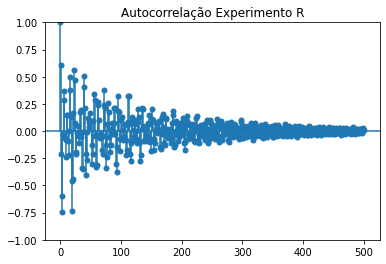

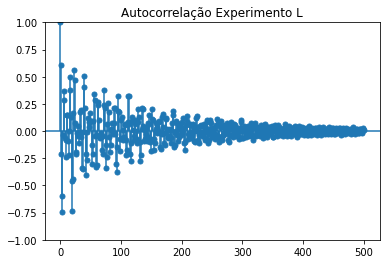

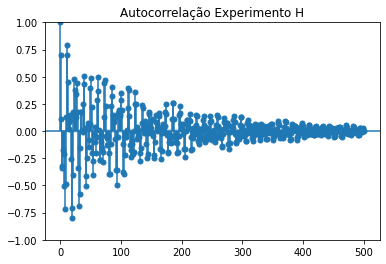

In [153]:
tsaplots.plot_acf(RCh2, lags=500,title='Autocorrelação Caso R')
tsaplots.plot_acf(LCh2, lags=500,title='Autocorrelação Caso L')
tsaplots.plot_acf(HCh4, lags=500,title='Autocorrelação Caso H')
#tsaplots.plot_acf(RCh5, lags=500,title='Autocorrelação Ch5 experimento R')
#tsaplots.plot_acf(RCh6, lags=500,title='Autocorrelação Ch6 experimento R')
#tsaplots.plot_acf(RCh7, lags=500,title='Autocorrelação Ch7 experimento R')
#tsaplots.plot_acf(RCh8, lags=500,title='Autocorrelação Ch8 experimento R')
#tsaplots.plot_acf(RCh9, lags=500,title='Autocorrelação Ch9 experimento R')

plt.show()

In [155]:
RAR2 = AutoReg(RCh2, lags = 200).fit()
RAR3 = AutoReg(RCh3, lags = 200).fit()
RAR4 = AutoReg(RCh4, lags = 200).fit()
RAR5 = AutoReg(RCh5, lags = 200).fit()
RAR6 = AutoReg(RCh6, lags = 200).fit()
RAR7 = AutoReg(RCh7, lags = 200).fit()
RAR8 = AutoReg(RCh8, lags = 200).fit()
RAR9 = AutoReg(RCh9, lags = 200).fit()
RAR=np.concatenate([RAR2.params,RAR3.params,RAR4.params,RAR5.params,RAR6.params,RAR7.params,RAR8.params,RAR9.params])

HAR2 = AutoReg(HCh2, lags = 200).fit()
HAR3 = AutoReg(HCh3, lags = 200).fit()
HAR4 = AutoReg(HCh4, lags = 200).fit()
HAR5 = AutoReg(HCh5, lags = 200).fit()
HAR6 = AutoReg(HCh6, lags = 200).fit()
HAR7 = AutoReg(HCh7, lags = 200).fit()
HAR8 = AutoReg(HCh8, lags = 200).fit()
HAR9 = AutoReg(HCh9, lags = 200).fit()
HAR=np.concatenate([HAR2.params,HAR3.params,HAR4.params,HAR5.params,HAR6.params,HAR7.params,HAR8.params,HAR9.params])

LAR2 = AutoReg(HCh2, lags = 200).fit()
LAR3 = AutoReg(HCh3, lags = 200).fit()
LAR4 = AutoReg(HCh4, lags = 200).fit()
LAR5 = AutoReg(HCh5, lags = 200).fit()
LAR6 = AutoReg(HCh6, lags = 200).fit()
LAR7 = AutoReg(HCh7, lags = 200).fit()
LAR8 = AutoReg(HCh8, lags = 200).fit()
LAR9 = AutoReg(HCh9, lags = 200).fit()
LAR=np.concatenate([LAR2.params,LAR3.params,LAR4.params,LAR5.params,LAR6.params,LAR7.params,LAR8.params,LAR9.params])
